In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams['figure.figsize'] = [30,15]
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv("penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
X = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
y = df['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
rfm = RandomForestClassifier()
rfm.fit(X_train, y_train)
y_pred = rfm.predict(X_test)
print('Accuracy: {:.2f}'.format(rfm.score(X_test, y_test)))

Accuracy: 0.93


In [6]:
rfm = RandomForestClassifier(n_estimators=500,criterion='entropy', max_depth=5)
rfm.fit(X_train, y_train)
y_pred = rfm.predict(X_test)
print('Accuracy: {:.2f}'.format(rfm.score(X_test, y_test)))

Accuracy: 0.95


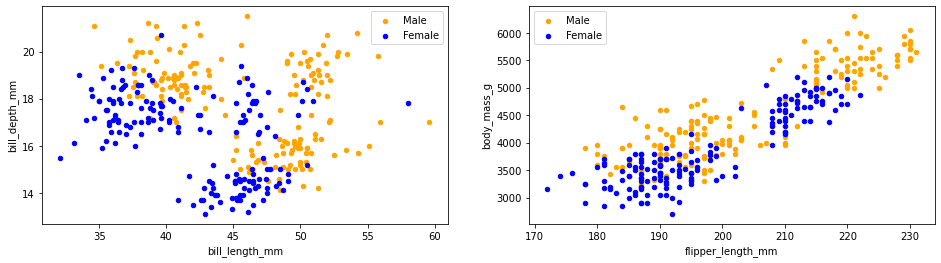

In [7]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,4)

df[df.sex=='Male'].plot(kind='scatter',x='bill_length_mm',y='bill_depth_mm',color='orange', label='Male', ax = ax1)
df[df.sex=='Female'].plot(kind='scatter',x='bill_length_mm',y='bill_depth_mm',color='blue', label='Female',ax=ax1)

df[df.sex=='Male'].plot.scatter(x='flipper_length_mm',y='body_mass_g',color='orange', label='Male', ax = ax2)
df[df.sex=='Female'].plot.scatter(x='flipper_length_mm',y='body_mass_g',color='blue', label='Female',ax=ax2)

plt.show()

In [8]:
# Example of the output using input
rfm.predict([[40,18, 195, 3250]])

/Users/prabhatm/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Female'], dtype=object)

In [9]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      Female       0.97      0.95      0.96        60
        Male       0.93      0.95      0.94        40

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [10]:
# Accuracy
print("Test Accuracy Score:", rfm.score(X_test, y_test)) #Predicted correctly/Total values

Test Accuracy Score: 0.95
